# Newtons Law of Cooling
$$
\frac{dT}{dt}(t) = K[M - T]
$$

where 
- T: is the temperature of the object at time t, 
- M: is the temperature of its surroundings
- K: is a constant of proportionality greater than 0. $\\$
A classic example is a hot coffee in a room that is cooler than the temperature of the coffee


In [7]:
import numpy as np
from scipy.optimize import fsolve
from typing import Callable


def Newton_cool(T: float, K: float, M: float) -> float:
    """
    Newton Cooling ODE function that returns the derivative of temperature with respect to time.

    Parameters:
    T (float): Temperature of the object.
    M (float): Temperature of the surrounding area.
    K (float): Proportionality constant.

    Returns:
    float: Derivative of temperature with respect to time.
    """
    return K * (M - T)

def true_sol(T0: float, M: float, K: float, t: float) -> float:
    """
    Exact solution of the Newton's Law of Cooling.

    Parameters:
    T0 (float): Initial temperature of the object.
    M (float): Temperature of the surrounding area.
    K (float): Proportionality constant.
    t (float): Time.

    Returns:
    float: Temperature at time t.
    """
    return M + (T0 - M) * np.exp(-K * t)

def euler_method(func: Callable, method: str, T0: float, M: float, K: float, TT: float, h: float) -> np.ndarray:
    """
    Generalized Euler method function to approximate the solution of the ODE using either forward or backward Euler method.

    Parameters:
    func (Callable): Function representing the ODE.
    method (str): Euler method type ('forward' or 'backward').
    T0 (float): Initial temperature.
    M (float): Temperature of the surrounding area.
    K (float): Proportionality constant.
    TT (float): Final time for simulation.
    h (float): Time step.

    Returns:
    np.ndarray: Array of approximated temperatures over time.
    """
    if h <= 0:
        raise ValueError("Time step h must be positive")
    
    num_steps = int(TT / h)
    temperatures = np.zeros(num_steps)
    temperatures[0] = T0

    # find the errors
    error = np.zeros(num_steps)
    for i in range(1, num_steps):
        if method == 'forward':
            temperatures[i] = temperatures[i - 1] + h * func(temperatures[i - 1], K, M)
        elif method == 'backward':
            f = lambda y: y - temperatures[i - 1] - h * func(y, K, M)
            temperatures[i] = fsolve(f, temperatures[i - 1])  # Using previous temperature as initial guess
        else:
            raise ValueError("Method must be 'forward' or 'backward'")
        t = i * h # time step multiplied by the step size gives us the time
        error[i] = np.abs(temperatures[i] - true_sol(T0, M, K, t))

    return temperatures, error


# Example usage
T0 = 40  # Initial temperature
M = 25   # Surrounding temperature
K = 2    # Proportionality constant
TT = 5  # Final time
h_list = [0.1, 0.01, 0.001]

# Approximating using both methods

results_backward = [euler_method(Newton_cool, 'backward', T0, M, K, TT, h) for h in h_list]
results_forward = [euler_method(Newton_cool, 'forward', T0, M, K, TT, h) for h in h_list]

approx_temps_backward, error_temps_backward = zip(*results_backward)
approx_temps_forward, error_temps_forward = zip(*results_forward)

# Plotting the Results of 
- Eulers method (Explict)
- Eulers method (implicit)
- True Solution

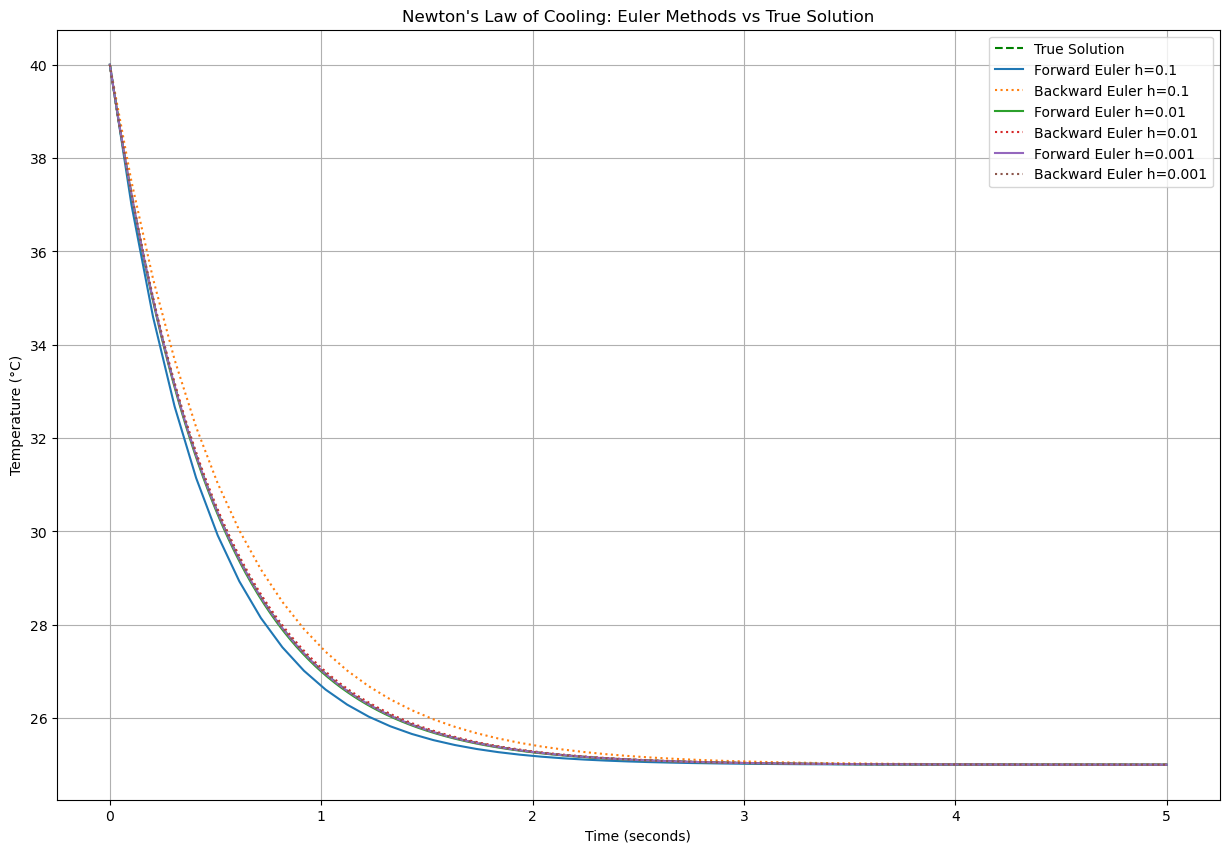

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_approximations(T0, M, K, TT, h_list, true_sol_func, euler_method_func, Newton_cool_func):
    plt.figure(figsize=(15, 10))

    # True solution
    t_fine = np.linspace(0, TT, 1000)
    true_solution = true_sol_func(T0, M, K, t_fine)
    plt.plot(t_fine, true_solution, color='green', linestyle='dashed', label='True Solution')

    for h in h_list:
        # Time array for each h, now using consistent step calculation
        num_steps = int(TT / h)
        t = np.linspace(0, TT, num_steps)

        # Approximations
        approx_temp_forward = euler_method_func(Newton_cool_func, 'forward', T0, M, K, TT, h)[0]
        approx_temp_backward = euler_method_func(Newton_cool_func, 'backward', T0, M, K, TT, h)[0]

        # Plotting
        plt.plot(t, approx_temp_forward, label=f'Forward Euler h={h}')
        plt.plot(t, approx_temp_backward, label=f'Backward Euler h={h}', linestyle='dotted')

    plt.xlabel('Time (seconds)')
    plt.ylabel('Temperature (°C)')
    plt.title('Newton\'s Law of Cooling: Euler Methods vs True Solution')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot approximations
plot_approximations(T0, M, K, TT, h_list, true_sol, euler_method, Newton_cool)


# looking at the difference in approximations from the true solution under a shorter time interval

- We can further see the gap between each method for each h value

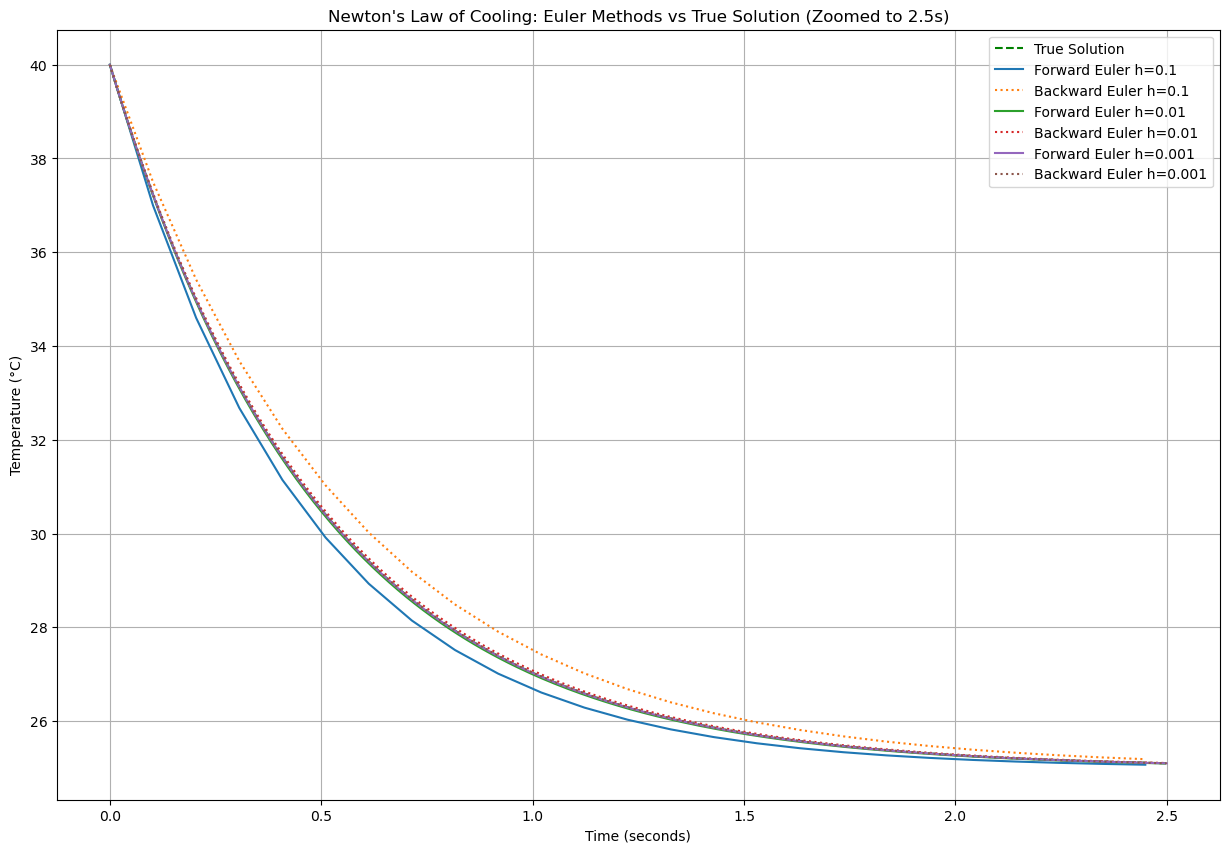

In [9]:
def plot_approximations_zoomed(T0, M, K, TT, h_list, true_sol_func, euler_method_func, Newton_cool_func):
    plt.figure(figsize=(15, 10))

    # True solution
    t_fine = np.linspace(0, TT, 1000) 
    t_fine_zoomed = t_fine[t_fine <= 2.5] # truncating the t values to stop at 2.5 seconds
    true_solution_zoomed = true_sol_func(T0, M, K, t_fine_zoomed)
    plt.plot(t_fine_zoomed, true_solution_zoomed, color='green', linestyle='dashed', label='True Solution')

    for h in h_list:
        # Full time array for Euler methods
        t = np.linspace(0, TT, int(TT / h))

        # Approximations for full range
        approx_temp_forward = euler_method_func(Newton_cool_func, 'forward', T0, M, K, TT, h)[0]
        approx_temp_backward = euler_method_func(Newton_cool_func, 'backward', T0, M, K, TT, h)[0]

        # Truncate to 2.5 seconds for plotting
        t_zoomed = t[t <= 2.5]
        approx_temp_forward_zoomed = approx_temp_forward[:len(t_zoomed)]
        approx_temp_backward_zoomed = approx_temp_backward[:len(t_zoomed)]

        # Plotting
        plt.plot(t_zoomed, approx_temp_forward_zoomed, label=f'Forward Euler h={h}')
        plt.plot(t_zoomed, approx_temp_backward_zoomed, label=f'Backward Euler h={h}', linestyle='dotted')

    plt.xlabel('Time (seconds)')
    plt.ylabel('Temperature (°C)')
    plt.title('Newton\'s Law of Cooling: Euler Methods vs True Solution (Zoomed to 2.5s)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot approximations zoomed to 2.5 seconds
plot_approximations_zoomed(T0, M, K, TT, h_list, true_sol, euler_method, Newton_cool)


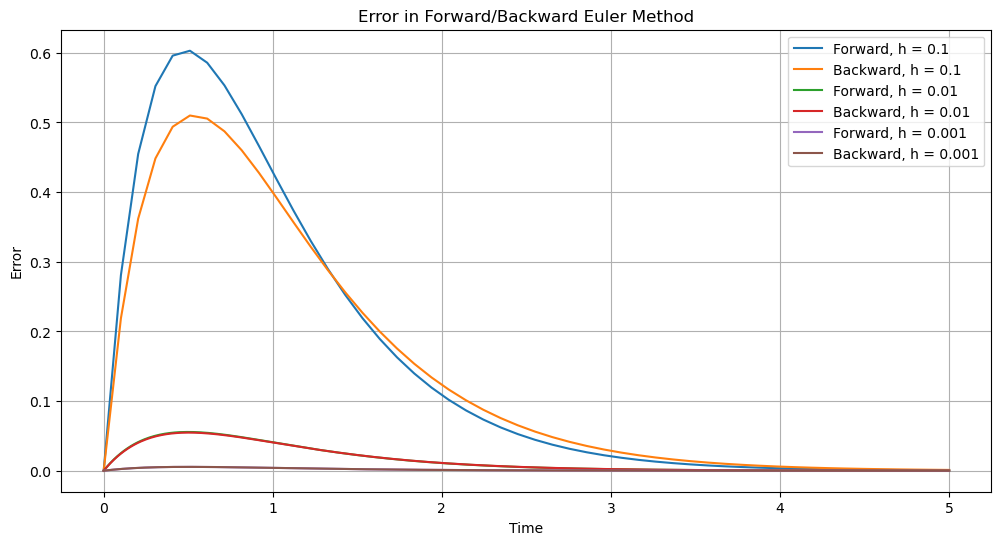

In [10]:
import matplotlib.pyplot as plt

# Plotting error for forward Euler method
plt.figure(figsize=(12, 6))

for i, h in enumerate(h_list):
    num_steps = len(error_temps_forward[i])  # Determine the number of steps from the error array length
    time_points = np.linspace(0, TT, num_steps)  # Use linspace to ensure matching array lengths

    plt.plot(time_points, error_temps_forward[i], label=f'Forward, h = {h}')
    plt.plot(time_points, error_temps_backward[i], label=f'Backward, h = {h}')

plt.title('Error in Forward/Backward Euler Method')
plt.xlabel('Time')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

